<a href="https://www.kaggle.com/code/jy2040/cnn-model?scriptVersionId=92979140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [32]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
import numpy as np
import time

In [2]:
%%time
from sklearn.datasets import fetch_olivetti_faces

CPU times: user 226 ms, sys: 49.5 ms, total: 276 ms
Wall time: 578 ms


In [40]:
%%time
olivetti_faces = fetch_olivetti_faces()

CPU times: user 20 ms, sys: 2.04 ms, total: 22.1 ms
Wall time: 21.6 ms


In [41]:
print(olivetti_faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

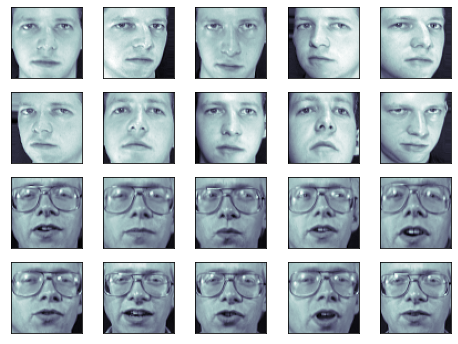

In [42]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(olivetti_faces.images[i], cmap=plt.cm.bone)

In [43]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

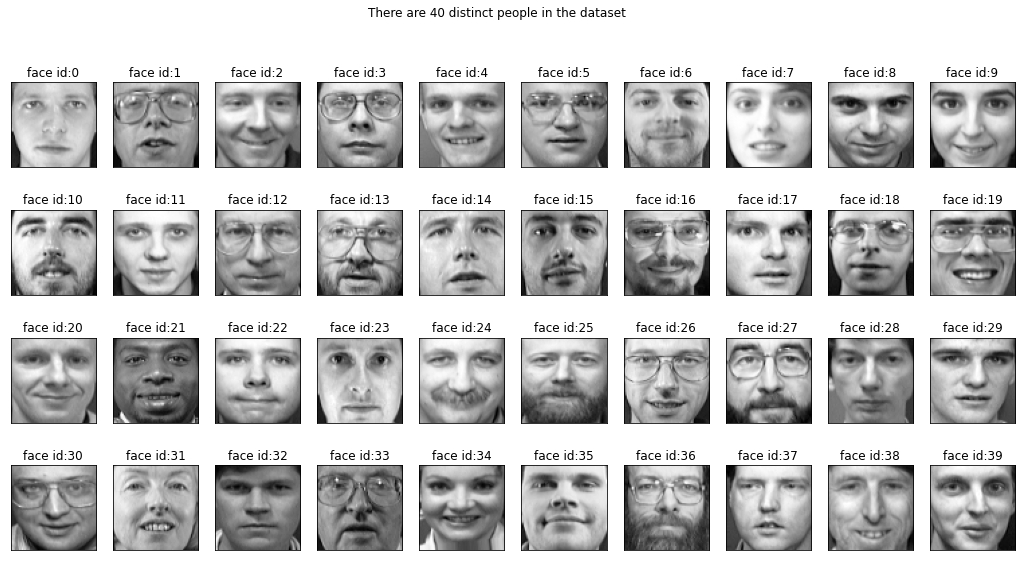

In [44]:
show_40_distinct_people(olivetti_faces.images, np.unique(olivetti_faces.target))

In [45]:
# preprocessing the image
img = olivetti_faces.images
img = img.reshape(img.shape[0],img.shape[1],img.shape[2],1)
# img = img/255.0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img, olivetti_faces.target, test_size=0.33, random_state=42)

In [46]:
print("Training data...\n Trining Image:",X_train.shape,"Training Labels:",y_train.shape)
print("Test data...\n Test Image:",X_test.shape,"Test Labels:",y_test.shape)

Training data...
 Trining Image: (268, 64, 64, 1) Training Labels: (268,)
Test data...
 Test Image: (132, 64, 64, 1) Test Labels: (132,)


### CNN without Augmentation

In [47]:
%%time
# model without conv2d layer
model = Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation = 'relu'),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.Dense(40,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train,y_train,epochs=20,batch_size = 32, validation_data= (X_test, y_test))

Epoch 1/20
9/9 [==============================] - 0s 19ms/step - loss: 4.5058 - accuracy: 0.0261 - val_loss: 4.3269 - val_accuracy: 0.0076
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 4.0112 - accuracy: 0.0597 - val_loss: 3.9635 - val_accuracy: 0.0227
Epoch 3/20
9/9 [==============================] - 0s 5ms/step - loss: 3.7520 - accuracy: 0.0373 - val_loss: 3.7113 - val_accuracy: 0.0606
Epoch 4/20
9/9 [==============================] - 0s 7ms/step - loss: 3.5778 - accuracy: 0.0634 - val_loss: 3.6297 - val_accuracy: 0.0682
Epoch 5/20
9/9 [==============================] - 0s 5ms/step - loss: 3.4435 - accuracy: 0.1082 - val_loss: 3.6198 - val_accuracy: 0.0455
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 3.2941 - accuracy: 0.1381 - val_loss: 3.3946 - val_accuracy: 0.1439
Epoch 7/20
9/9 [==============================] - 0s 7ms/step - loss: 3.1156 - accuracy: 0.2164 - val_loss: 3.2859 - val_accuracy: 0.1364
Epoch 8/20
9/9 [=================

In [48]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 1.6134 - accuracy: 0.5909


[1.6134012937545776, 0.5909090638160706]

In [49]:
'''
Here the model is performing well on training data and there's a chance that after few more epochs the model might
overfit on the data.

And after evaluating it on the test data, it is confirmed the model is overfitting on the training data.
For this there might be two reasons behind it.
1) Limited data: we only have 400 images and we are feeding only 268.
2) The kernel size: here the kernel size is 3 x 3 which is comparatively smaller than 64 x 64
   For image classification we do not need that much of features as long as we have the basic information like eyes, 
   edges and all we can classify the person's image.
   So we really do not need this small rectangular(kernel) to hover above the image to identify the features.
'''

"\nHere the model is performing well on training data and there's a chance that after few more epochs the model might\noverfit on the data.\n\nAnd after evaluating it on the test data, it is confirmed the model is overfitting on the training data.\nFor this there might be two reasons behind it.\n1) Limited data: we only have 400 images and we are feeding only 268.\n2) The kernel size: here the kernel size is 3 x 3 which is comparatively smaller than 64 x 64\n   For image classification we do not need that much of features as long as we have the basic information like eyes, \n   edges and all we can classify the person's image.\n   So we really do not need this small rectangular(kernel) to hover above the image to identify the features.\n"

In [50]:
%%time
# model with conv2d layers
# and adding up the new layers as require to increase the accuracy
# averagepooling and maxpooling

# dropout layer(0.5), what it will do is...
# as we train things, 50% of the connection at this layer will drop out and epoch will 
# be more effecting bacause things are getting dropped out and each of the connection will 
# generalize more and will give more meaningfull connection to the layer

model = Sequential([
    keras.layers.AveragePooling2D(4,4, input_shape = (64,64,1)),
    keras.layers.Conv2D(32,3,activation = 'relu'),
    keras.layers.Conv2D(16,3,activation = 'relu'),
#     keras.layers.MaxPooling2D(2,2),
#     keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
#     keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(40,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train,y_train,epochs=20,batch_size = 32,validation_data=(X_test,y_test))

Epoch 1/20
9/9 [==============================] - 0s 20ms/step - loss: 3.7204 - accuracy: 0.0261 - val_loss: 3.7102 - val_accuracy: 0.0152
Epoch 2/20
9/9 [==============================] - 0s 6ms/step - loss: 3.6683 - accuracy: 0.0448 - val_loss: 3.7069 - val_accuracy: 0.0152
Epoch 3/20
9/9 [==============================] - 0s 7ms/step - loss: 3.6395 - accuracy: 0.0597 - val_loss: 3.7515 - val_accuracy: 0.0152
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 3.6016 - accuracy: 0.0448 - val_loss: 3.7223 - val_accuracy: 0.0076
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 3.5455 - accuracy: 0.1045 - val_loss: 3.7197 - val_accuracy: 0.0606
Epoch 6/20
9/9 [==============================] - 0s 7ms/step - loss: 3.4592 - accuracy: 0.2201 - val_loss: 3.6209 - val_accuracy: 0.1894
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 3.3003 - accuracy: 0.3433 - val_loss: 3.4579 - val_accuracy: 0.2500
Epoch 8/20
9/9 [=================

In [51]:
%%time
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4922 - accuracy: 0.8788
CPU times: user 62.9 ms, sys: 6.05 ms, total: 69 ms
Wall time: 65.6 ms


[0.49215075373649597, 0.8787878751754761]

In [52]:
'''
I have tried different thing(to overcome the 2nd reason) on the above model as follows...
1) Conv2D->Conv2D->Flatten->Dense : Accuracy on test data - 0.8561
2) AveragePooling2D->Conv2D->Conv2D->Flatten->Dense : Accuracy on test data - 0.8712
3) AveragePooling2D->Conv2D->Conv2D->MaxPooling2D->Flatten->Dense : Accuracy on test data - 0.4697
4) AveragePooling2D->Conv2D->Conv2D->Dropout->Flatten->Dense - Accuracy on test data - 0.8636
5) AveragePooling2D->Conv2D->Conv2D->Flatten->Dense->Dense - Accuracy on test data - 0.7803

So I will be using the model number 2 to train the data after augmenting it.
'''

'\nI have tried different thing(to overcome the 2nd reason) on the above model as follows...\n1) Conv2D->Conv2D->Flatten->Dense : Accuracy on test data - 0.8561\n2) AveragePooling2D->Conv2D->Conv2D->Flatten->Dense : Accuracy on test data - 0.8712\n3) AveragePooling2D->Conv2D->Conv2D->MaxPooling2D->Flatten->Dense : Accuracy on test data - 0.4697\n4) AveragePooling2D->Conv2D->Conv2D->Dropout->Flatten->Dense - Accuracy on test data - 0.8636\n5) AveragePooling2D->Conv2D->Conv2D->Flatten->Dense->Dense - Accuracy on test data - 0.7803\n\nSo I will be using the model number 2 to train the data after augmenting it.\n'

### Data Augmentation

In [53]:
# rotating the images
# using the zoom range from 0.5 to 1 to make a different images with the existing one
xx = []
yy = []
xxT = []
yyT = []
for i in range(len(olivetti_faces.images)):
    data = olivetti_faces.images[i]
    samples = data.reshape(1,64,64,1)
    
#     zoom_range
    datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
    
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    for ii in range(9):
        xx.append(it[0][0])
        xxT.append(olivetti_faces.target[i])
    
#     rotate
    datagen1 = ImageDataGenerator(rotation_range=90)
    it1 = datagen.flow(samples, batch_size=1)
    for ii in range(9):
        yy.append(it1[0][0])
        yyT.append(olivetti_faces.target[i])

In [54]:
tempXX = np.asarray(xx)
tempYY = np.asarray(yy)
tempXX = tempXX.reshape(3600,64,64)
tempYY = tempYY.reshape(3600,64,64)
augData = np.concatenate((olivetti_faces.images,tempXX),axis=0)
augData = np.concatenate((augData,tempYY) , axis = 0)
xxT = np.asarray(xxT)
yyT = np.asarray(yyT)
target = np.concatenate((olivetti_faces.target,xxT),axis = 0)
target = np.concatenate((target,yyT),axis = 0)

print("Image Data After Augmentation :",augData.shape)
print("Target Data After Augmentation :",target.shape)

Image Data After Augmentation : (7600, 64, 64)
Target Data After Augmentation : (7600,)


### Preprocessing the Augmented Data

In [55]:
img = augData.reshape(augData.shape[0],augData.shape[1],augData.shape[2],1)
# img = img/255.0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img, target, test_size=0.33, random_state=42)

In [56]:
print("Training data...\n Trining Image:",X_train.shape,"Training Labels:",y_train.shape)
print("Test data...\n Test Image:",X_test.shape,"Test Labels:",y_test.shape)

Training data...
 Trining Image: (5092, 64, 64, 1) Training Labels: (5092,)
Test data...
 Test Image: (2508, 64, 64, 1) Test Labels: (2508,)


### CNN after Data Augmentation

In [57]:
%%time
model = Sequential([
    keras.layers.AveragePooling2D(4,4, input_shape = (64,64,1)),
    keras.layers.Conv2D(32,3,activation = 'relu'),
    keras.layers.Conv2D(16,3,activation = 'relu'),
#     keras.layers.MaxPooling2D(2,2),
#     keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
#     keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(40,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

model.fit(X_train,y_train,epochs=20,batch_size = 32,validation_data=(X_test,y_test))

Epoch 1/20
160/160 [==============================] - 1s 5ms/step - loss: 2.9548 - accuracy: 0.2722 - val_loss: 1.5315 - val_accuracy: 0.6220
Epoch 2/20
160/160 [==============================] - 1s 4ms/step - loss: 0.9073 - accuracy: 0.7630 - val_loss: 0.6983 - val_accuracy: 0.8138
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 0.4519 - accuracy: 0.8816 - val_loss: 0.4137 - val_accuracy: 0.8828
Epoch 4/20
160/160 [==============================] - 1s 4ms/step - loss: 0.2850 - accuracy: 0.9246 - val_loss: 0.2822 - val_accuracy: 0.9286
Epoch 5/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1910 - accuracy: 0.9521 - val_loss: 0.2121 - val_accuracy: 0.9430
Epoch 6/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1422 - accuracy: 0.9633 - val_loss: 0.1808 - val_accuracy: 0.9514
Epoch 7/20
160/160 [==============================] - 1s 4ms/step - loss: 0.1175 - accuracy: 0.9703 - val_loss: 0.2004 - val_accuracy: 0.9426
Epoch 

In [58]:
%%time
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9876
CPU times: user 281 ms, sys: 61.6 ms, total: 343 ms
Wall time: 410 ms


[0.041256390511989594, 0.9876395463943481]

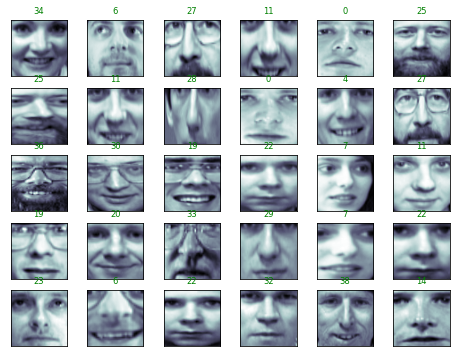

In [23]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(olivetti_faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = model.predict(X_test[i, np.newaxis])[0]
    y_pred = np.argmax(y_pred)
    color = ('green' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

### SVC tutorial from the class demo

In [59]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

In [60]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(faces.data, faces.target, random_state=0)

print(X_train1.shape, X_test1.shape)

(300, 4096) (100, 4096)


In [61]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=False)
pca.fit(X_train1)

PCA(n_components=150)

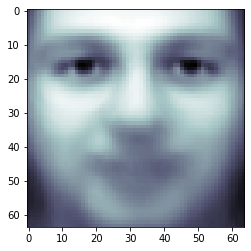

In [62]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

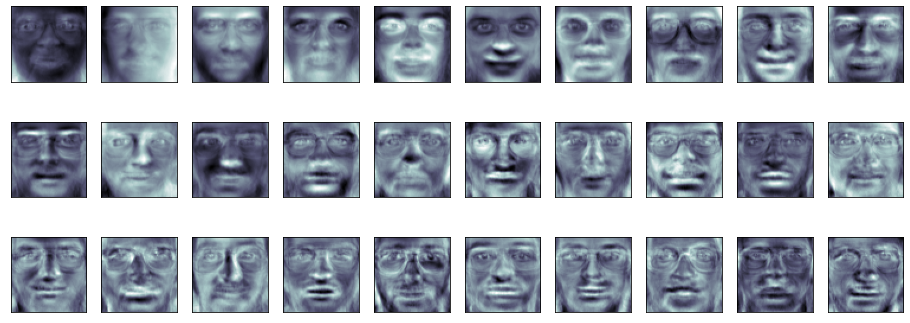

In [63]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

In [64]:
X_train_pca1 = pca.transform(X_train1)
X_test_pca1 = pca.transform(X_test1)
print(X_train_pca1.shape)

(300, 150)


In [65]:
%%time
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca1, y_train1)

CPU times: user 30.8 ms, sys: 1.61 ms, total: 32.4 ms
Wall time: 31.9 ms


SVC(C=5.0, gamma=0.001)

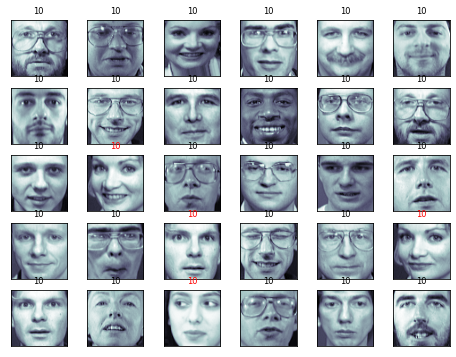

In [66]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test1[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred1 = clf.predict(X_test_pca1[i, np.newaxis])[0]
    color = ('black' if y_pred1 == y_test1[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [67]:
%%time
y_pred_clf1 = clf.predict(X_test_pca1)

CPU times: user 10.3 ms, sys: 900 µs, total: 11.2 ms
Wall time: 10.6 ms


In [68]:
print("Accuracy using the SVC classifier :",accuracy_score(y_test1, y_pred_clf1))

Accuracy using the SVC classifier : 0.83


### SVM performace on Augmented Data

In [80]:
# rotating the images
# using the zoom range from 0.5 to 1 to make a different images with the existing one
xx = []
yy = []
xxT = []
yyT = []
for i in range(len(olivetti_faces.data)):
    data = olivetti_faces.images[i]
    samples = data.reshape(1,64,64,1)
    
#     zoom_range
    datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
    
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    for ii in range(9):
        xx.append(it[0][0])
        xxT.append(olivetti_faces.target[i])
    
#     rotate
    datagen1 = ImageDataGenerator(rotation_range=90)
    it1 = datagen.flow(samples, batch_size=1)
    for ii in range(9):
        yy.append(it1[0][0])
        yyT.append(olivetti_faces.target[i])

In [81]:
tempXX = np.asarray(xx)
tempYY = np.asarray(yy)
tempXX = tempXX.reshape(3600,64,64)
tempYY = tempYY.reshape(3600,64,64)
augData = np.concatenate((olivetti_faces.images,tempXX),axis=0)
augData = np.concatenate((augData,tempYY) , axis = 0)
xxT = np.asarray(xxT)
yyT = np.asarray(yyT)
target = np.concatenate((olivetti_faces.target,xxT),axis = 0)
target = np.concatenate((target,yyT),axis = 0)

print("Image Data After Augmentation :",augData.shape)
print("Target Data After Augmentation :",target.shape)

Image Data After Augmentation : (7600, 64, 64)
Target Data After Augmentation : (7600,)


In [82]:
img = augData.reshape(augData.shape[0],augData.shape[1]*augData.shape[2])
# img = img/255.0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img, target, test_size=0.33, random_state=42)

In [83]:
print("Training data...\n Trining Image:",X_train.shape,"Training Labels:",y_train.shape)
print("Test data...\n Test Image:",X_test.shape,"Test Labels:",y_test.shape)

Training data...
 Trining Image: (5092, 4096) Training Labels: (5092,)
Test data...
 Test Image: (2508, 4096) Test Labels: (2508,)


In [84]:
pca = decomposition.PCA(n_components=150, whiten=False)
pca.fit(X_train)

PCA(n_components=150)

In [85]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(5092, 150)


In [86]:
%%time
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

CPU times: user 1.06 s, sys: 0 ns, total: 1.06 s
Wall time: 1.05 s


SVC(C=5.0, gamma=0.001)

In [87]:
%%time
y_pred_clf = clf.predict(X_test_pca)

CPU times: user 2.49 s, sys: 0 ns, total: 2.49 s
Wall time: 2.49 s


In [88]:
print("Accuracy using the SVC classifier(Augmented Data) :",accuracy_score(y_test, y_pred_clf))

Accuracy using the SVC classifier(Augmented Data) : 0.9884370015948963


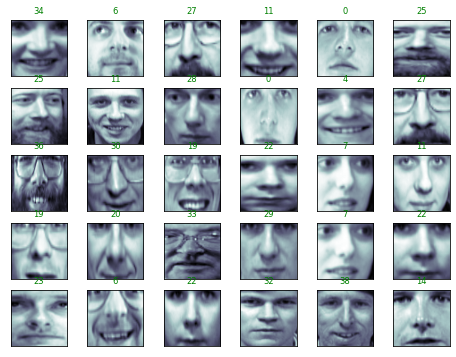

In [90]:
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('green' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

### Results and Comparison

In [ ]:
'''
Results without Data Augmentation

    Training & Evaluation Time difference:
        Clearly there's huge difference between training time of both models.
        SVM is taking very less time comparing to CNN(GPU).
        
        SVM Training Time : Wall time: 31.9 ms
        CNN Training Time : Wall time: 1.58 s

        SVM Prediction Time : Wall time: 10.6 ms
        CNN Evaluation Time : Wall time: 65.6 ms

    Accuracy difference:
        SVM Accuracy : 0.83
        CNN Accuracy : 0.8788

Results With AUgmented Data

    Training & Evaluation Time difference:
        SVM Training Time : Wall time: 1.05 s
        CNN Training Time : Wall time: 21 s

        SVM Prediction Time : Wall time: 2.49 s
        CNN Evaluation Time : Wall time: 410 ms
    
    Accuracy difference:
        SVM Accuracy : 0.9884370015948963
        CNN Accuracy : 0.9876
        
        
SVM and CNN both are giving almost same accuracy but SVM is taking less time to train the data comparing to CNN model.
While in testing the unseen data, there's a huge difference. CNN model is doing it in very less time than SVM model.

We could further optimize CNN model if we would get less accuracy but ~99% is the best accuracy according to me. So
I did not optimize it further more. The model I created is predicting the best on the given data.

SVM is performing less accurate than CNN without Data Augmentation.
'''